<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-03-datapreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np  # fast operations on arrays
import seaborn as sns  # plots
import matplotlib.pyplot as plt  # plots

df = pd.DataFrame([
    ['Cola',   'low',    '05/07/2021', 10, 2],
    ['Bread',  'medium', '05/07/2021', 25, 1],
    ['Beer',   'high',   '06/07/2021', 100, 3],
    ['Diaper', 'high',   '06/07/2021', np.nan, 4],
    ['Pizza',  'medium', '06/07/2021', 25, 5]], columns=['ID', 'PriceBin', 'Date', 'Quantity', 'Review'])
df

,ID,PriceBin,Date,Quantity,Review
0,Cola,low,05/07/2021,10.0,2
1,Bread,medium,05/07/2021,25.0,1
2,Beer,high,06/07/2021,100.0,3
3,Diaper,high,06/07/2021,NaN,4
4,Pizza,medium,06/07/2021,25.0,5


## What transformations can we apply?

- **Encoding**: transforming categorical attributes into continuous ones
- **Discretization**: transforming continuous attributes into categorical ones
- **Normalization**: normalizing continuous attributes such that their values fall in the same range
- **Imputation**: imputing missing values
- **Rebalancing**: adjusting the class distribution of a dataset (i.e., the ratio between the different classes/categories represented)
- **Feature Engineering**: defining the set of relevant attributes (variables, predictors) to be used in model construction

# Data distribution

In [ ]:
# array with distinct values sorted by first appearance
df["Quantity"].unique()

array([ 10.,  25., 100.,  nan])

In [ ]:
# quantity of unique values
df["Quantity"].nunique()

3

In [ ]:
# return a new series that associates each value with its number of occurrences, sorted by frequency
df["Quantity"].value_counts()

,count
Quantity,
25.0,2
10.0,1
100.0,1


<Axes: >

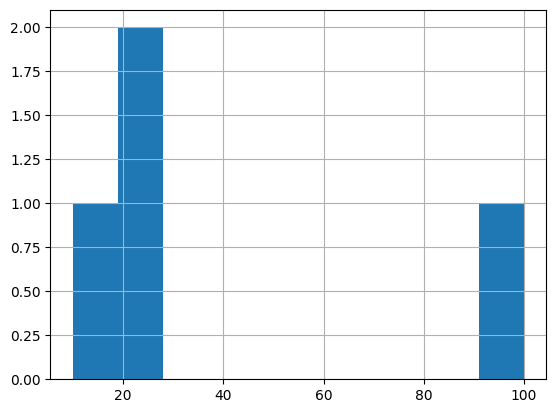

In [ ]:
df["Quantity"].hist(bins=10)

## Skewed distributions

![image](https://user-images.githubusercontent.com/18005592/232750742-aacbf6b3-8a7d-49c6-b253-5ab8e7985104.png)

What problems can arise with skewed distributions?

## Sequences of transformations

Things are even more complex when applying sequences of transformations

- E.g., normalization should be applied before rebalancing since rebalancing (e.g., by resampling) alters average and standard deviations
- E.g., applying feature engineering before/after rebalancing produces different results which depends on the dataset and the algorithm

![image](https://user-images.githubusercontent.com/18005592/232754117-8a84fde5-bce2-41b1-a003-7dfa0b63f980.png)

More an art than a science
- ... At least for now


# Missing values

Datasets often show missing values
- E.g., they are not applicable (e.g., date of death) or unknown
- A series can have missing values, referred to as `NA` (Not Available)
- Numeric attributes: `NA` is `np.nan` (Not a Number)
- `nan` is never equal, greater, or lower than other values (nor itself)

        np.nan == np.nan
        False
- Numeric expressions with `nan` return `nan`

        2 * np.nan – 1
        nan
Which problems arise from missing values?

## `isna`

In [ ]:
# add the column "isna", True if the value is NaN
df["isna"] = df["Quantity"].isna()
# add the column "notna", False if the value is NaN
df["notna"] = df["Quantity"].notna()
df[["Quantity", "isna", "notna"]]

,Quantity,isna,notna
0,10.0,False,True
1,25.0,False,True
2,100.0,False,True
3,NaN,True,False
4,25.0,False,True


## Imputing missing values

Several strategies

- Replace `nan` with average or median values
- Dropping rows/columns with nans

What are the effects?

What if we have temporal attributes?

In [ ]:
# fill the missing value with the average
df["Quantity_imputed"] = df["Quantity"].fillna(df["Quantity"].mean())  # fillna replaces NA values
df[["Quantity", "Quantity_imputed"]]

,Quantity,Quantity_imputed
0,10.0,10.0
1,25.0,25.0
2,100.0,100.0
3,NaN,40.0
4,25.0,25.0


In [ ]:
# fill the missing value with the previous (not NaN) value
df["Quantity"].ffill()

,Quantity
0,10.0
1,25.0
2,100.0
3,100.0
4,25.0


In [ ]:
# fill the missing value with the following (not NaN) value
df["Quantity"].bfill()

,Quantity
0,10.0
1,25.0
2,100.0
3,25.0
4,25.0


In [ ]:
df["Quantity"].dropna()

,Quantity
0,10.0
1,25.0
2,100.0
4,25.0


In [ ]:
df.dropna()

,ID,PriceBin,Date,Quantity,Review,isna,notna,Quantity_imputed
0,Cola,low,05/07/2021,10.0,2,False,True,10.0
1,Bread,medium,05/07/2021,25.0,1,False,True,25.0
2,Beer,high,06/07/2021,100.0,3,False,True,100.0
4,Pizza,medium,06/07/2021,25.0,5,False,True,25.0


# Feature engineering

Feature engineering, in data science, refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.

We focus on **feature selection**


## Feature selection

Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction

- *Search technique* for proposing new feature subsets
- *Evaluation measure* which scores the different feature subsets

Simplest algorithm is to test each possible subset of features finding the one which minimizes the error rate

- This is an exhaustive search of the space, and is computationally intractable for all but the smallest of feature sets
- Main categories of feature selection algorithms: wrappers, filters and embedded methods

## Wappers and filters

*Wrapper methods* use a predictive model to score feature subsets

- Each new subset is used to train a model, which is tested on a hold-out set
- Counting the number of mistakes made on that hold-out set (the error rate of the model) gives the score for that subset
- As wrapper methods train a new model for each subset, they are very computationally intensive, but usually provide good results
- *Stepwise regression* adds the best feature (or deletes the worst feature) at each round

*Filter methods* use a proxy measure instead of the error rate to score a feature subset

- This measure is chosen to be fast to compute, while still capturing the usefulness of the feature set (mutual information, Pearson correlation)
- Filters are usually less computationally intensive than wrappers, but they produce a feature set which is not tuned to a specific type of predictive model
- Filter methods have also been used as a preprocessing step for wrapper methods, allowing a wrapper to be used on larger problems

## Embedded methods

*Embedded methods* perform feature selection as part of the model construction process

- The exemplar of this approach is the LASSO method for constructing a linear model, which penalizes the regression coefficients with an L1 penalty, shrinking many of them to zero
- Any features which have non-zero regression coefficients are 'selected' by the LASSO algorithm

LASSO (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

-  The lasso method assumes that the coefficients of the linear model are sparse, meaning that few of them are non-zero.

[1] Katrutsa, Alexandr, and Vadim Strijov. "Comprehensive study of feature selection methods to solve multicollinearity problem according to evaluation criteria." Expert Systems with Applications 76 (2017): 1-11.

[2] Chan, Jireh Yi-Le, et al. "Mitigating the multicollinearity problem and its machine learning approach: a review." Mathematics 10.8 (2022): 1283.


# Exercise

1. Add a new column: `population_per_household = population / households`
1. Add a new column: `rooms_per_household = total_rooms / households`
1. Add a new column: `bedrooms_per_room = total_bedrooms / total_rooms`
1. Filling in (i.e., impute) missing values with the median value
1. Apply standardization to all the numeric columns
1. One hot encode `ocean_proximity` since it is a categorical attribute

In [ ]:
# Write your code here